In [1]:
# Import matplotlib library
import matplotlib.pyplot as plt
import pandas as pd

import cv2
 
# Import scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
 
import numpy as np
import os
import random

# Part 1 - Visualizing the Face Images

In [2]:
with open('face_data/s1/1.pgm', 'rb') as image:
    img = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

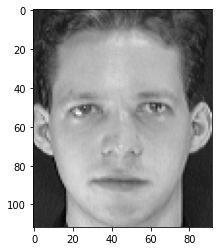

In [3]:
plt.imshow(img, cmap="gray")

In [4]:
# Function to load image
def loadImages(folder, y):
    images = []
    labels = []
    pics = os.listdir(folder)
    for pic in pics:
        img = cv2.imread(os.path.join(folder,pic))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # transform to grayscale
        if img is not None:
            images.append(img)
            labels.append(y)
    return images, labels

# Function to load image from folder
def load_images_from_folder(folder):
    images = []
    labels = []
    dirs = os.listdir(folder)
    dirs.remove("README")
    for directory in dirs:
        y = directory[1:]
        path = os.path.join(folder, directory)
        i, l = loadImages(path, y)
        images = images + i 
        labels = labels + l
    images = np.array(images) 
    labels = np.array(labels)
    return images, labels

In [5]:
# Function to plot images in 4 * 4 
def plot_gallery(images, h, w, n_row = 4, n_col = 4):
    plt.figure(figsize =(1.2 * n_col, 1.6 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[random.randint(0, 399)].reshape((h, w)), cmap = plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

In [6]:
folder = 'face_data'
X, y = load_images_from_folder(folder)
n_samples, h, w = X.shape

### 1. Visualize randomly selected 16 faces in a 4×4 grid [4 rows and 4 columns].

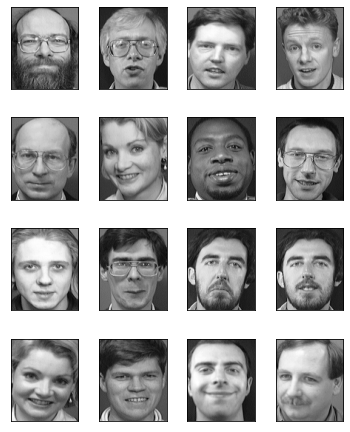

In [7]:
plot_gallery(X, h, w)

### 2. Report the face image size, number of images and number of classes.

In [8]:
n_samples, h, w = X.shape
n_classes = len(y)

print(">>> Report <<<")
print("face_image_size height: %d" % h)
print("face_image_size width: %d" % w)
print("number of images: %d" % n_samples)
print("n_classes: %d" % n_classes)

>>> Report <<<
face_image_size height: 112
face_image_size width: 92
number of images: 400
n_classes: 400


# Part 2 - Train Test Split

1. Generate Train and Test set from the dataset in the following manner.
2. Select the first nine images of each subject for the Train set.
3. Select the last image of each subject for the Test set.
4. Flatten each image into 1D vector so that the dataset size is N × L, where N is the number of samples in the train/test set and L is the length of flattened image (L = 92 × 112 = 10304).
5. Report the number of images in Train set and Test set.

In [9]:
# flatten the dataset
flatten_data = X.flatten()

In [10]:
# Function to split data into train and test dataset
def custom_train_test_split(data, labels):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    for i in range(len(data)):
        if i%10 != 9:
            X_train.append(data[i].flatten())
            y_train.append(labels[i])
        else:
            X_test.append(data[i].flatten())
            y_test.append(labels[i])
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = custom_train_test_split(X, y)

### Report the number of images in Train set and Test set

In [11]:
print(">>> Report <<<")
print("number of images in Train set: %d" % len(X_train))
print("number of images in Test set: %d" % len(X_test))

>>> Report <<<
number of images in Train set: 360
number of images in Test set: 40


# Part 3 - Apply PCA to Get Eigenfaces

### 1. Apply PCA using scikit-learn on the Train set

In [12]:
# Get the train data
train_data = pd.DataFrame(X_train)

### 2. Take first 20 principal components in the feature space. These are known as eigenfaces.

In [13]:
# Steps to apply PCA
pca = PCA(n_components=20)

principalComponents = pca.fit_transform(train_data)
principalDf = pd.DataFrame(data = principalComponents)

principalDf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3488.861760,3950.800210,2327.402094,-9.258342,-1364.469553,-1297.807791,119.787391,-1544.814675,-116.068692,-1680.551008,-302.141113,388.988478,211.820238,-2044.155838,182.916414,-901.109318,-143.601948,-263.241591,-1028.631087,728.294633
1,4347.520596,1681.925664,2547.644932,-2439.204116,819.317384,-1208.591232,-36.886120,-945.800106,-240.668768,-1799.224693,-1464.258882,-435.684609,287.867942,-1179.710189,-524.794747,-284.126225,-119.685394,576.450774,588.969074,-696.724058
2,3341.299556,3942.764529,2304.096556,-1301.965761,356.764731,-1310.904095,-665.578522,-1013.059715,-271.823528,-864.523215,-528.259032,57.920184,429.841047,-2329.988560,-79.084892,46.033454,-673.824275,182.347047,-711.113495,-49.702712
3,3568.997861,3925.683214,2438.787112,-371.311159,-952.429440,-1252.281137,248.891431,-1088.294931,-552.756066,-1361.212614,-696.200468,265.106748,12.849667,-2444.192170,-75.629866,-375.033473,-583.942507,-134.886671,-832.840538,389.633497
4,4251.387965,2258.275698,2612.320468,-2546.752890,387.582297,-780.299601,-458.901840,-433.023509,-442.110622,-1587.515863,-1559.291257,-402.662630,50.219003,-1868.642125,-33.927474,-659.286511,-513.631028,413.813158,46.202422,-322.683364


In [14]:
# Get the eigenfaces
eigenfaces = pca.components_.reshape((20, h, w))

### 3. Visualize the first 16 eigenfaces. For visualization, reshape the flattened vector to original image shape.

In [15]:
# Function to plot eigenfaces in 4 * 4 
def plot_first_sixteen(eigenfaces, h, w, n_row = 4, n_col = 4):
    plt.figure(figsize =(1.2 * n_col, 1.6 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(eigenfaces[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

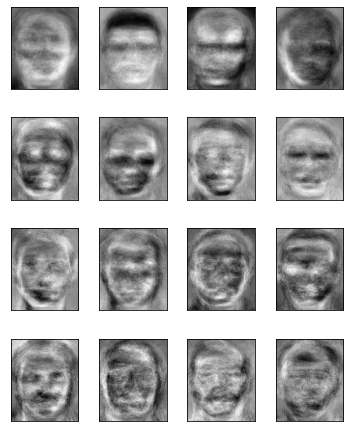

In [16]:
plot_first_sixteen(eigenfaces, h, w)

# Part 4 - Face Recognition

In [17]:
test_data = pd.DataFrame(X_test)
print(test_data.shape)

(40, 10304)


In [18]:
eigenfaces_flatten = eigenfaces.reshape(20, 112*92)

### 1. Calculate the weights of the training samples using the given formula.

In [19]:
train_sample_weights = np.matmul(eigenfaces_flatten, (train_data - pca.mean_).T).T
print(train_sample_weights.shape)

(360, 20)


### 2. For each test image, calculate weights similarly.

In [20]:
test_sample_weights = np.matmul(eigenfaces_flatten, (test_data - pca.mean_).T).T
print(test_sample_weights.shape)

(40, 20)


### 3. Take the minimum euclidean distance between the test image weight and all the training sample weights to predict the class of the test image.

In [21]:
# Function to predict the class given a test
def predict(one_test): 
    euclidean_distance_for_one_image = one_test - train_sample_weights
    distance = np.linalg.norm(euclidean_distance_for_one_image, axis=1)
    min_index = np.argmin(distance)
    return min_index

result = np.apply_along_axis(predict, 1, test_sample_weights)
print(result)

print("Predict the class of the test image:")
print(np.array(y_train)[result])

[  8  14 323  27  37  48  62  66  79  85  97  99 114 260 130 141  13 159
 166 172 186 196 200 208 275 225 239 246  89 264 273 284 294 300 307 317
 329 341 350 355]
Predict the class of the test image:
['34' '33' '40' '2' '32' '35' '3' '4' '26' '19' '21' '17' '28' '36' '11'
 '16' '33' '20' '27' '18' '8' '1' '6' '39' '38' '37' '7' '9' '19' '31'
 '38' '22' '25' '13' '14' '40' '15' '12' '24' '23']


### 4. For each test image, Visualize the test image and the train image with minimum dis- tance.

In [22]:
# Function to plot test image in 5 * 8
def plot_test_images(test_data, y_test, h, w, n_row = 5, n_col = 8):
    plt.figure(figsize =(1.2 * n_col, 1.6 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(test_data[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.title('test #% s' % y_test[i])
        plt.xticks(())
        plt.yticks(())

# Function to plot train image in 5 * 8
def plot_train_images(X_train, y_train, result, h, w, n_row = 5, n_col = 8):
    plt.figure(figsize =(1.2 * n_col, 1.6 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(X_train[result[i]].reshape((h, w)), cmap = plt.cm.gray)
        plt.title('train #% s' % y_train[result[i]])
        plt.xticks(())
        plt.yticks(())
    

Visualize test image


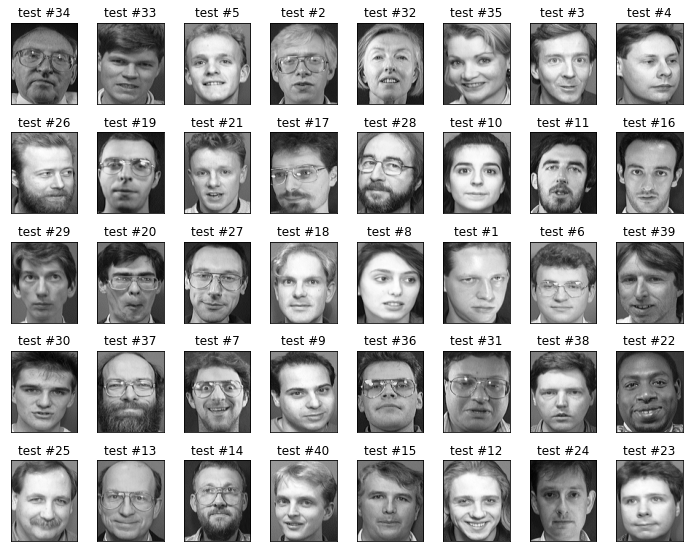

In [23]:
print("Visualize test image")
plot_test_images(X_test, y_test, h, w)

Visualize train image


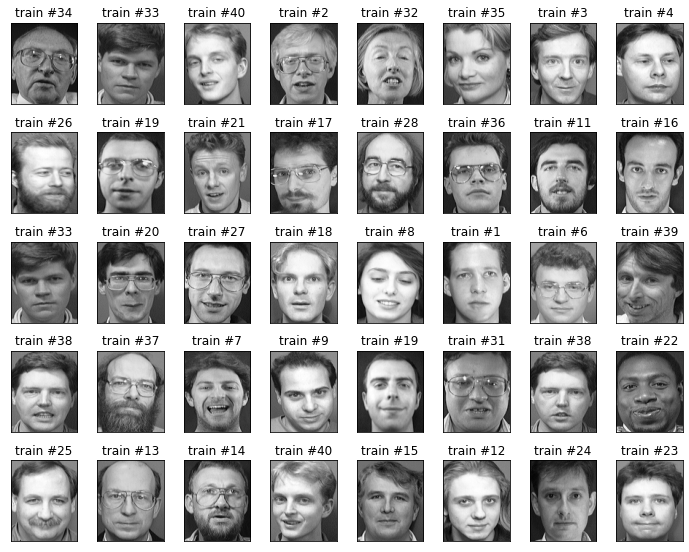

In [24]:
print("Visualize train image")
plot_train_images(X_train, y_train, result, h, w)

### 5. Report accuracy and total explained variance ratio by the selected components.

In [25]:
test_labels = y_test
print(test_labels)

['34', '33', '5', '2', '32', '35', '3', '4', '26', '19', '21', '17', '28', '10', '11', '16', '29', '20', '27', '18', '8', '1', '6', '39', '30', '37', '7', '9', '36', '31', '38', '22', '25', '13', '14', '40', '15', '12', '24', '23']


In [26]:
train_min_lables = np.array(y_train)[result]
print(train_min_lables)

['34' '33' '40' '2' '32' '35' '3' '4' '26' '19' '21' '17' '28' '36' '11'
 '16' '33' '20' '27' '18' '8' '1' '6' '39' '38' '37' '7' '9' '19' '31'
 '38' '22' '25' '13' '14' '40' '15' '12' '24' '23']


In [27]:
# Calculate the accuracy
accuracy = accuracy_score(test_labels, train_min_lables)
print(accuracy)

0.875


In [28]:
# Calculate the variance
print(pca.explained_variance_ratio_)

[0.0950363  0.06034678 0.03743482 0.03358942 0.02106934 0.019346
 0.01675248 0.01561086 0.01375828 0.0128858  0.0123327  0.01144945
 0.0108614  0.00963258 0.00927487 0.00892884 0.00809338 0.00806783
 0.00771897 0.00759628]


# Part 5 - Face Recognition

### 1. Repeat Part 4 using only first two principal components instead of 20. Visualize the first two eigenfaces.

In [29]:
new_eigenfaces = eigenfaces[0:2]

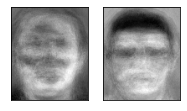

In [30]:
# Function to plot eigenfaces in 4 * 4 
def plot_new_eigenfaces(eigenfaces, h, w, n_row = 1, n_col = 2):
    plt.figure(figsize =(1.2 * n_col, 1.6 * n_row))
    plt.subplots_adjust(bottom = 0, left =.01, right =.99, top =.90, hspace =.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(eigenfaces[i].reshape((h, w)), cmap = plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_new_eigenfaces(new_eigenfaces, h, w)

In [31]:
new_eigenfaces_flatten = new_eigenfaces.reshape(2, 112*92)
new_train_sample_weights = np.matmul(new_eigenfaces_flatten, (train_data - pca.mean_).T).T
new_test_sample_weights = np.matmul(new_eigenfaces_flatten, (test_data - pca.mean_).T).T

In [32]:
# Function to predict the class given a test
def new_predict(one_test): 
    euclidean_distance_for_one_image = one_test - new_train_sample_weights
    distance = np.linalg.norm(euclidean_distance_for_one_image, axis=1)
    min_index = np.argmin(distance)
    return min_index

new_result = np.apply_along_axis(new_predict, 1, new_test_sample_weights)
print(new_result)

print("Predict the class of the test image:")
print(np.array(y_train)[result])

[  7  11 181  34 176 185 185 321  71 108 273 107 112 323 127 172 152 317
 165 187 323 196 205 210 147 302 160 182  64 267 151 284 294 138 314  59
 327  55 350 125]
Predict the class of the test image:
['34' '33' '40' '2' '32' '35' '3' '4' '26' '19' '21' '17' '28' '36' '11'
 '16' '33' '20' '27' '18' '8' '1' '6' '39' '38' '37' '7' '9' '19' '31'
 '38' '22' '25' '13' '14' '40' '15' '12' '24' '23']


Visualize test image


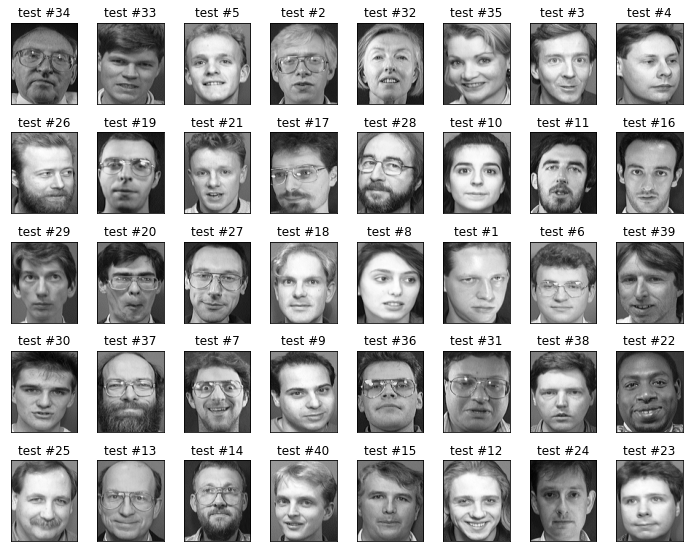

In [33]:
print("Visualize test image")
plot_test_images(X_test, y_test, h, w)

Visualize train image


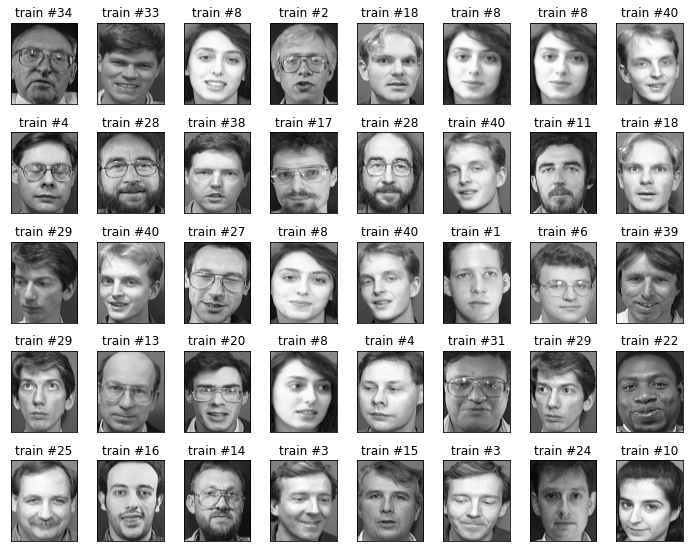

In [34]:
print("Visualize train image")
plot_train_images(X_train, y_train, new_result, h, w)

### 2. Repeat Part 5.

In [35]:
new_train_min_lables = np.array(y_train)[new_result]

# Calculate the accuracy
accuracy2 = accuracy_score(test_labels, new_train_min_lables)
print(accuracy2)

0.425


### 3. Compare the results using the explained variance ratio of PCA.

In [36]:
total_variance_ratio_of_pca = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]
print(total_variance_ratio_of_pca)

0.15538307501371562


As we can see here, the variance ratio of PCA is only about 0.155, since we only apply the first two principal components out of 20.

Therefore, the accuracy of the prediction decrease from 0.875 to 0.425.